# GD vs SGD

Three essentials for the equation of a circle  
First: The x-coordinate of the center. denote it as 'a'.  
Second: The y-coordinate of the center. denote it as 'b'.  
Third: The radius. denote it as 'r'.  

Construct the Loss Function using these three,   
and update 'a', 'b', and 'r' through gradient descent.  

$$L(a,b,r) = ((x-a)^2+(y-b)^2-r^2)^2$$

In [1]:
from utils import *

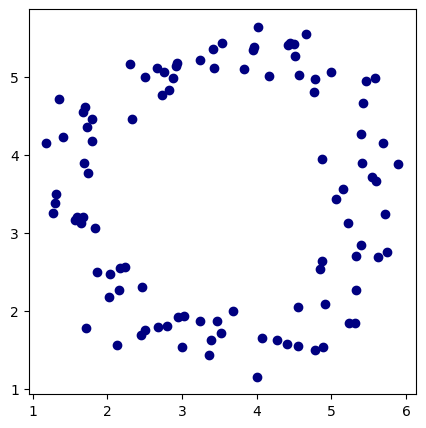

In [2]:
# make synthetic distribution 
np.random.seed(0)
x, y = make_circle(n_samples = 100, noise = 0.1, radius = 2, center = (3,3))

plt.figure(figsize=(5,5))
plt.scatter(x,y, c = 'navy')
plt.show()

Gradient Descent

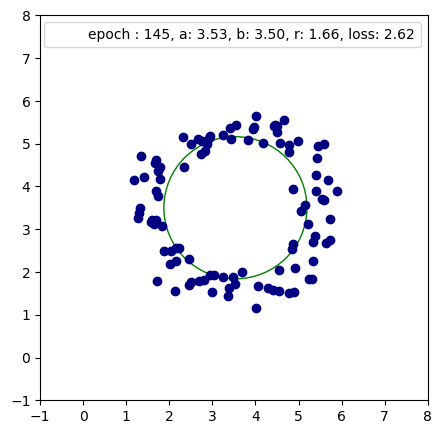

In [3]:
_FILL_ = None

# target_function : (x-a)**2 + (y-b)**2 = r**2

np.random.seed(1)
################# INITIALIZE ######################
# a=12 ; b=20; r=9
a=-7 ; b=9; r=0.1
learning_rate = 0.001
updates =150
time_sleep = 0.2
update_interval = 5

#############################################

for i, update in enumerate(range(updates)):
    loss = (((x-a)**2+(y-b)**2 - r**2)**2).mean()
    
    temp = (x-a)**2+(y-b)**2 - r**2

    a_grad = (-4 * temp * (x - a)).mean()
    b_grad = (-4 * temp * (y - b)).mean()
    r_grad = (-4 * temp * r).mean()
       
    a = a - a_grad*learning_rate
    b = b - b_grad*learning_rate
    r = r - r_grad*learning_rate

    plot_circle_fit(x, y, a, b, r, loss, update, interval = update_interval, sleep_time = 0.2 , batched = False)


Stochastic Gradient Descent

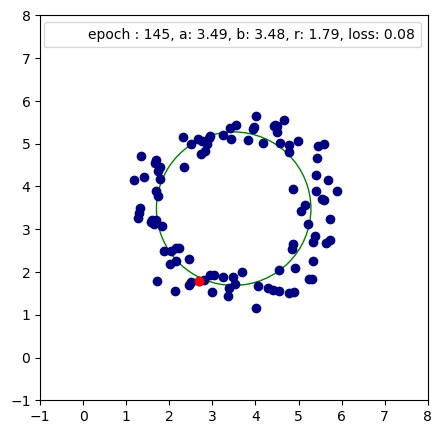

In [4]:
_FILL_ = None

np.random.seed(1)

################# INITIALIZE ######################
a=-7 ; b=9; r=0.1
learning_rate = 0.001
updates = 150

time_sleep = 0.2
update_interval = 5

#############################################

XX = np.vstack([x,y]).T
for update in range(updates):
    
    np.random.shuffle(XX)
    x_batch, y_batch = XX[0,:]
    
    loss = ((x_batch - a)**2 + (y_batch - b)**2 - r**2)**2
    temp = (x_batch-a)**2+(y_batch-b)**2 - r**2

    a_grad = (2*temp*-2*(x_batch-a))
    b_grad = (2*temp*-2*(y_batch-b))
    r_grad = (2*temp*-2*r)

    a = a - learning_rate * a_grad
    b = b - learning_rate * b_grad
    r = r - learning_rate * r_grad

    plot_circle_fit(x, y, a, b, r, loss, update, interval = update_interval, sleep_time = time_sleep, batched = True, batch_x = x_batch, batch_y = y_batch )